In [19]:
import pandas as pd
import numpy as np
import gdown
from os.path import isfile
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [20]:
csv_file = 'titanic3.csv'
if not isfile(csv_file):
    # https://drive.google.com/file/d/1Iz8V2S3Hp9X6iuEf0LM3bnY9ExdiUGcd/view?usp=sharing
    gdown.download(id='1Iz8V2S3Hp9X6iuEf0LM3bnY9ExdiUGcd', output=csv_file)

In [21]:
# import the csv file as pandas df
data = pd.read_csv(csv_file)

In [22]:
data.replace('nan', np.nan, inplace=True)
data = data.astype({'age': np.float64, 'fare': np.float64})

In [23]:
name='santi'

In [24]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

<Axes: xlabel='survived', ylabel='fare'>

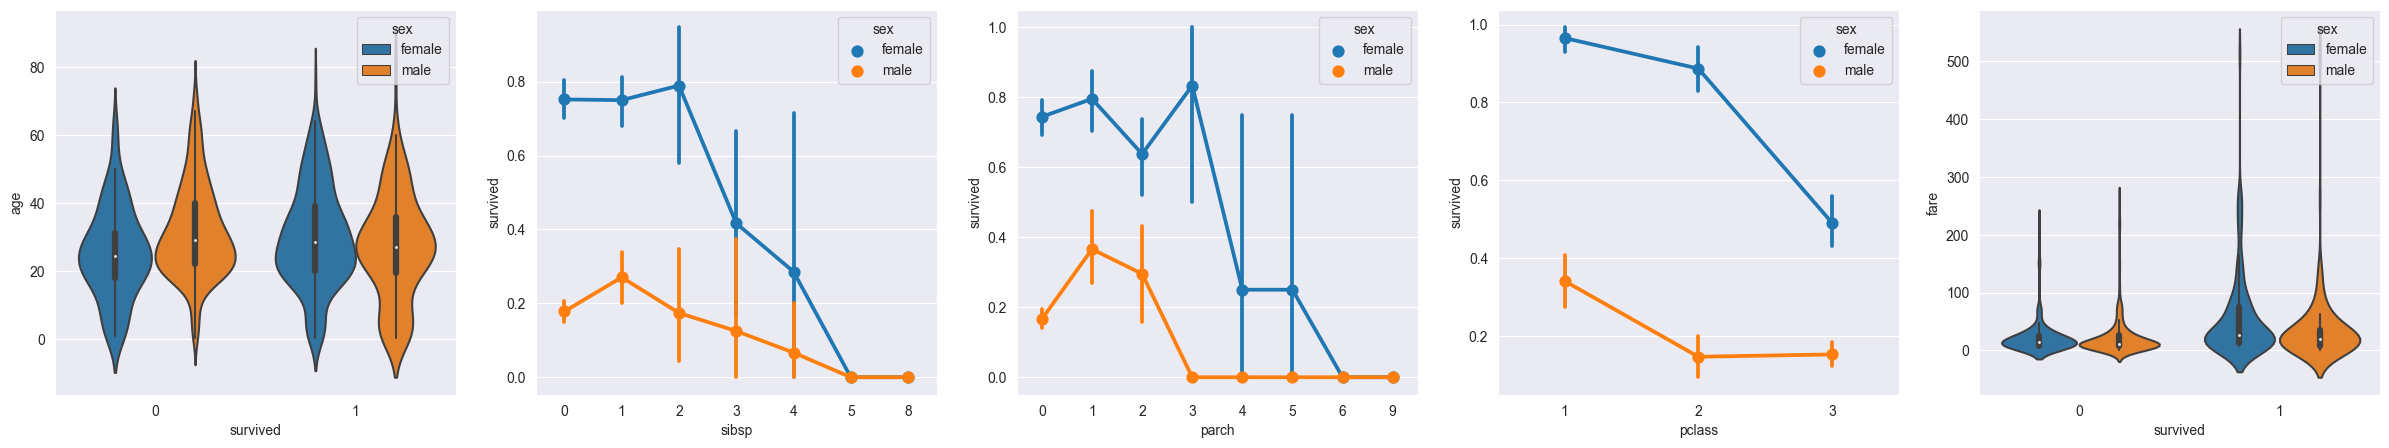

In [25]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x='survived', y='age', hue='sex', data=data, ax=axs[0])
sns.pointplot(x='sibsp', y='survived', hue='sex', data=data, ax=axs[1])
sns.pointplot(x='parch', y='survived', hue='sex', data=data, ax=axs[2])
sns.pointplot(x='pclass', y='survived', hue='sex', data=data, ax=axs[3])
sns.violinplot(x='survived', y='fare', hue='sex', data=data, ax=axs[4])

In [26]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [27]:
data.corr(numeric_only=True).abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [28]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",1,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [29]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [30]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [33]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [34]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885
